In [14]:
pwd

'C:\\Users\\go121\\practice_jupyter\\py\\데이터분석 및 시각화\\API자료수집\\05네이버API'

In [64]:
import os
import sys
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [73]:
search_list = ['메가커피', '이디야', '컴포즈', '빽다방', '스타벅스']

In [74]:
client_id = "sINqNPstJrYv4dDyStMK"
client_secret = "SKpquTbQWh"
def search_blog(search_title):
    encText = urllib.parse.quote(search_title)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        return json.loads(response_body)['total'], search_title
    else:
        print("Error Code:" + rescode)

In [75]:
res = []
for i in search_list:
    total, title = search_blog(i)
    res.append((total, title))

In [76]:
res = pd.DataFrame(res)
res

,0,1
0,383190,메가커피
1,710536,이디야
2,223352,컴포즈
3,346446,빽다방
4,6005596,스타벅스


<BarContainer object of 5 artists>

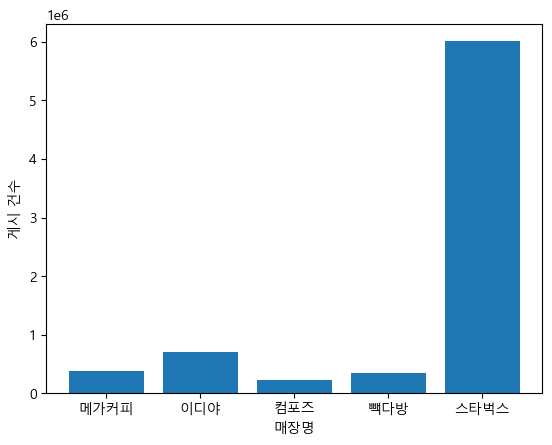

In [77]:
plt.xlabel('매장명')
plt.ylabel('게시 건수')
plt.bar(res[1],res[0], data=res)